In [4]:
import itertools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from matplotlib.ticker import NullFormatter


In [7]:
#this is our telecomminication data 
# Goal: We have to classify customer based on type of services thay have taken.
# There are four sevices 1, 2,3,4.
# Lets look our data
df=pd.read_csv('teleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [9]:
# Lets look on some datas
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [10]:
#lets count how much classes we have in " Practically"
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0DEE67B0>]],
      dtype=object)

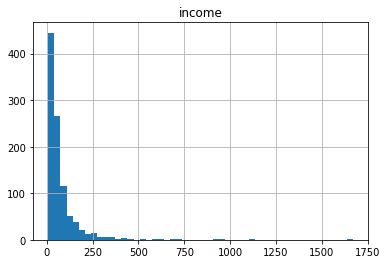

In [18]:
#lets plot hist according income...
df.hist(column='income',bins=50)

In [19]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [23]:
#we have to convert Dataframe into array to usable in Sklearn
X_data_array=df[["region",'tenure','age','marital','address','income','ed','employ','retire','gender','reside']]
X_data_array[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [26]:
# We have separated by independent ,lets separate by dependent
Y_data_array = df['custcat'].values
Y_data_array[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [40]:
#Now we have to normlise our data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_data_array)[0:5] # only for five columns 

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [43]:
# In classification we have to apply Stratify sampling rathor than random samplling as we do in previous sampling

In [51]:
#So splitting normalise data into testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_data_array,Y_data_array,test_size=0.2,random_state=4)

In [52]:
print('X_train :', X_train.shape, 'y_train :',y_train.shape)
print('X_test :',X_test.shape, 'y_test :', y_test.shape)

X_train : (800, 11) y_train : (800,)
X_test : (200, 11) y_test : (200,)


In [55]:
# Applying classification
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train,y_train)
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [57]:
#Lets pridict
y_pred=classifier.predict(X_test)

In [62]:
#Lets find Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [61]:
score

0.26

In [70]:
#Now taking k==6
classifier=KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred

array([2, 1, 3, 1, 4, 3, 3, 1, 3, 2, 4, 1, 3, 1, 3, 1, 2, 2, 3, 2, 2, 3,
       1, 2, 1, 3, 1, 2, 1, 1, 2, 3, 1, 2, 1, 2, 3, 2, 3, 1, 1, 2, 2, 2,
       3, 1, 2, 1, 4, 1, 3, 1, 2, 1, 3, 2, 3, 1, 1, 2, 1, 2, 1, 2, 4, 1,
       1, 2, 1, 1, 1, 3, 2, 3, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2,
       2, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 2, 3, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 3, 3, 2, 3, 1, 2,
       1, 2, 1, 2, 2, 1, 2, 3, 2, 3, 3, 2, 1, 1, 1, 2, 1, 2, 1, 3, 2, 1,
       3, 4, 3, 2, 1, 3, 2, 3, 1, 1, 3, 1, 1, 1, 4, 1, 2, 1, 1, 2, 4, 3,
       2, 2, 2, 1, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 2, 2, 3, 2, 2, 2,
       2, 2], dtype=int64)

In [71]:
score=accuracy_score(y_test,y_pred)
score

0.31

In [115]:
#We can take value from k = 0 upto 10.
#And find accuracy
k=10
acc=[]
std_div=[]
for i in range(1,11):
    classifier=KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_pred,y_test)
    print(accuracy)
    acc.append(accuracy)
    std=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    std_div.append(std)

0.275
0.31
0.275
0.26
0.3
0.295
0.35
0.33
0.32
0.32


In [116]:
y_pred.shape[0]

200

In [123]:
std_div

[0.031573327350787724,
 0.03270321085153566,
 0.03157332735078772,
 0.031016124838541645,
 0.0324037034920393,
 0.03224709289222828,
 0.033726843908080104,
 0.0332490601370926,
 0.032984845004941275,
 0.032984845004941275]

In [124]:
#Position where prediction matches
y_pred==y_test
accuracy

0.32

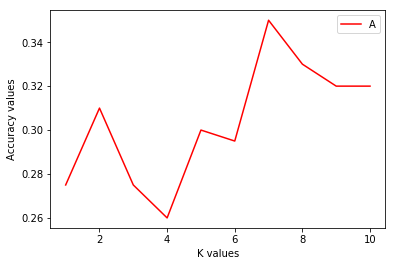

In [125]:
plt.plot(range(1,k+1),acc,'r')
plt.xlabel('K values')
plt.ylabel('Accuracy values')
plt.legend('Accuracy')
plt.show()

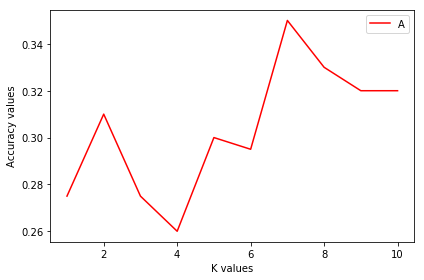

In [137]:
#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.plot(range(1,k+1),acc,'r')
plt.xlabel('K values')
plt.ylabel('Accuracy values')
plt.tight_layout()
plt.legend('Accuracy')
plt.show()

In [139]:
#finding best accuracy
print('Best accuracy is : ', max(acc) ,' with k = ',np.argmax(acc))

Best accuracy is :  0.35  with k =  6
